<a href="https://colab.research.google.com/github/Sagar-modelling/Motif_Discord/blob/main/stumpy_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 136 kB 20.5 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import stumpy

plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


In [ ]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


In [ ]:
steam_df.shape

(9600, 4)

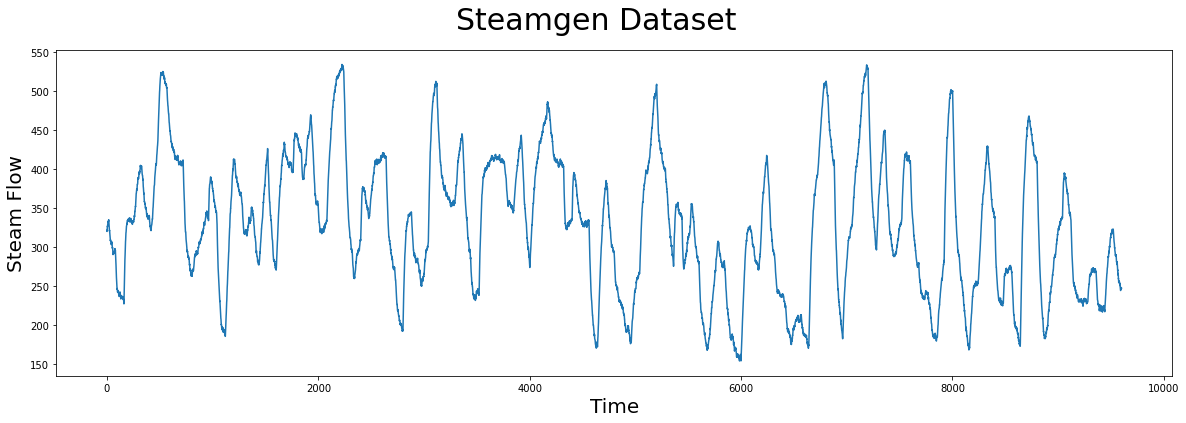

In [ ]:
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['drum pressure'].values)

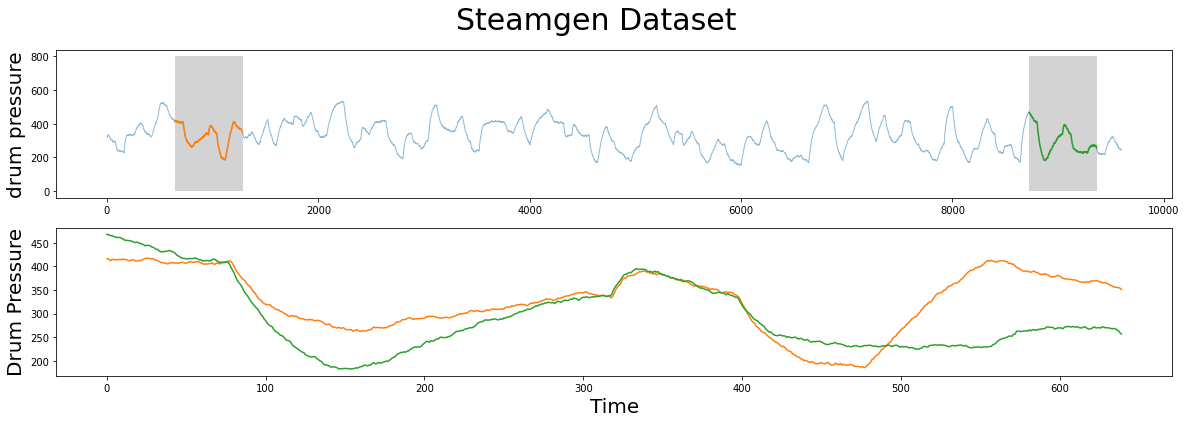

In [ ]:
m = 640 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('Steamgen Dataset', fontsize='30')
axs[0].set_ylabel("drum pressure", fontsize='20')
axs[0].plot(steam_df['drum pressure'], alpha=0.5, linewidth=1)
axs[0].plot(steam_df['drum pressure'].iloc[643:643+m])
axs[0].plot(steam_df['drum pressure'].iloc[8724:8724+m])

rect = Rectangle((643, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((8724, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Drum Pressure", fontsize='20')
axs[1].plot(steam_df['drum pressure'].values[643:643+m], color='C1')
axs[1].plot(steam_df['drum pressure'].values[8724:8724+m], color='C2')

In [ ]:
#finding motif using stump
m =640
mp = stumpy.stump(steam_df['drum pressure'], m)

In [ ]:
#The output of stump is an array that contains all of the matrix profile values (i.e., z-normalized Euclidean distance to your nearest neighbor)
#and matrix profile indices in the first and second columns

In [ ]:
mp

array([[18.38179539011476, 6264, -1, 6264],
       [18.355130052542606, 6264, -1, 6264],
       [18.328800304965124, 6265, -1, 6265],
       ...,
       [16.34367394563706, 2077, 2077, -1],
       [16.33470684811535, 2078, 2078, -1],
       [16.32310433027697, 2079, 2079, -1]], dtype=object)

In [ ]:
mp[:, 0].min()

9.17763228700418

In [ ]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 6404


In [ ]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 4799


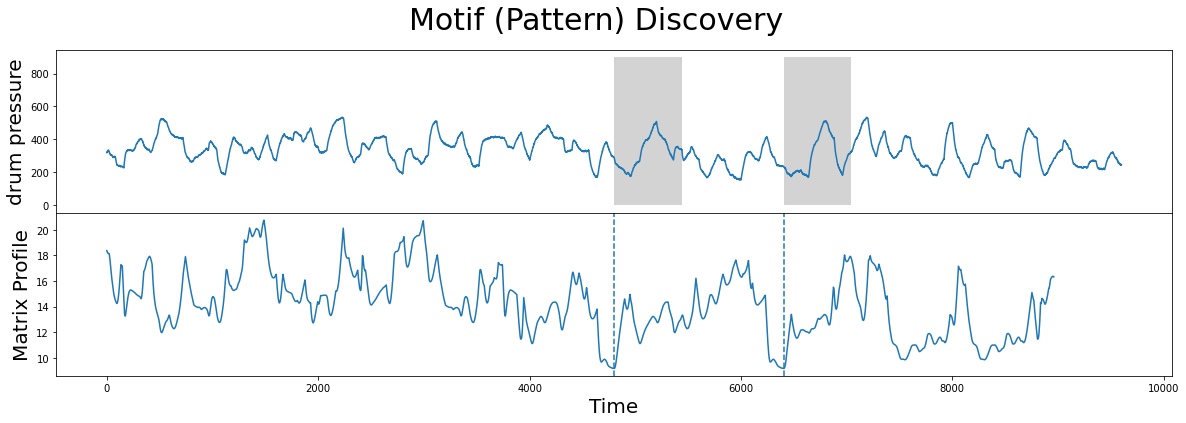

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')
axs[0].plot(steam_df['drum pressure'].values)
axs[0].set_ylabel('drum pressure', fontsize='20')
rect = Rectangle((6404, 0), m, 900, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((4799, 0), m, 900, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')

axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=6404, linestyle="dashed")
axs[1].axvline(x=4799, linestyle="dashed")
axs[1].plot(mp[:, 0])

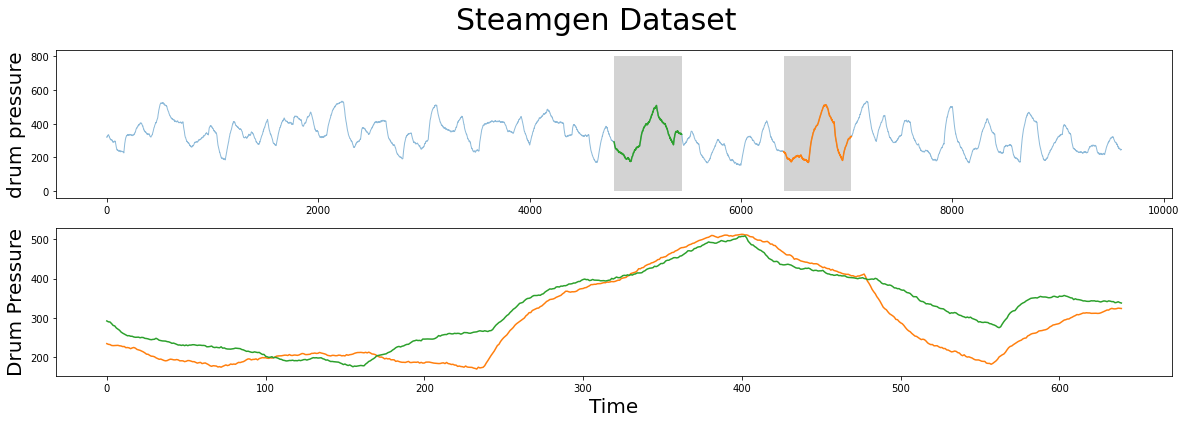

In [ ]:
m = 640 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('Steamgen Dataset', fontsize='30')
axs[0].set_ylabel("drum pressure", fontsize='20')
axs[0].plot(steam_df['drum pressure'], alpha=0.5, linewidth=1)
axs[0].plot(steam_df['drum pressure'].iloc[6404:6404+m])
axs[0].plot(steam_df['drum pressure'].iloc[4799:4799+m])

rect = Rectangle((6404, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((4799, 0), m, 800, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Drum Pressure", fontsize='20')
axs[1].plot(steam_df['drum pressure'].values[6404:6404+m], color='C1')
axs[1].plot(steam_df['drum pressure'].values[4799:4799+m], color='C2')

In [ ]:
discord_idx = np.argsort(mp[:, 0])[-1]
print(f"The discord is located at index {discord_idx}")

The discord is located at index 1487


In [ ]:
nearest_neighbor_idx = mp[discord_idx, 1]
print(f"The nearest neighbor for discord is located at index {nearest_neighbor_idx}")

The nearest neighbor for discord is located at index 8051


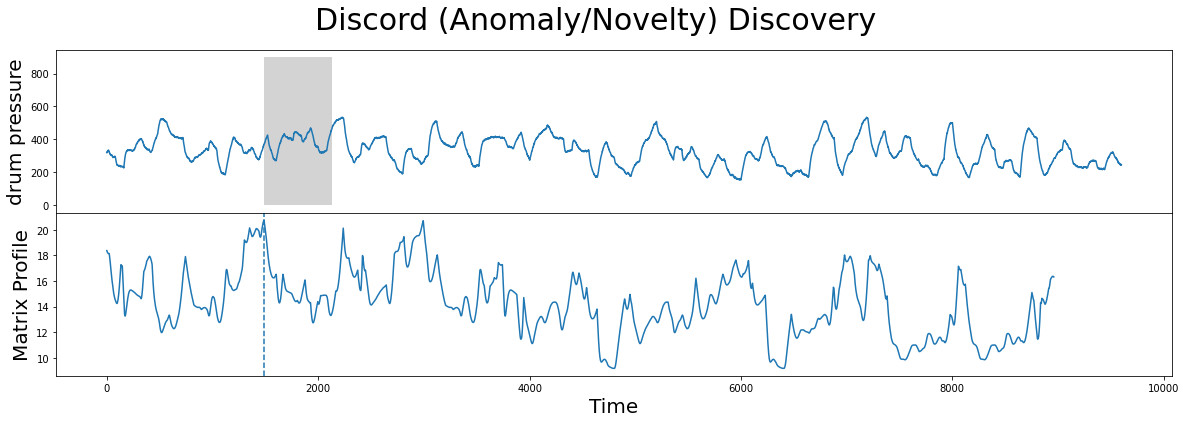

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(steam_df['drum pressure'].values)
axs[0].set_ylabel('drum pressure', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 900, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [ ]:
taxi_df = pd.read_csv("https://zenodo.org/record/4276428/files/STUMPY_Basics_Taxi.csv?download=1")
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df

,timestamp,value
0,2014-10-01 00:00:00,12751.0
1,2014-10-01 00:30:00,8767.0
2,2014-10-01 01:00:00,7005.0
3,2014-10-01 01:30:00,5257.0
4,2014-10-01 02:00:00,4189.0
...,...,...
3595,2014-12-14 21:30:00,16344.0
3596,2014-12-14 22:00:00,15913.0
3597,2014-12-14 22:30:00,14327.0
3598,2014-12-14 23:00:00,12060.0


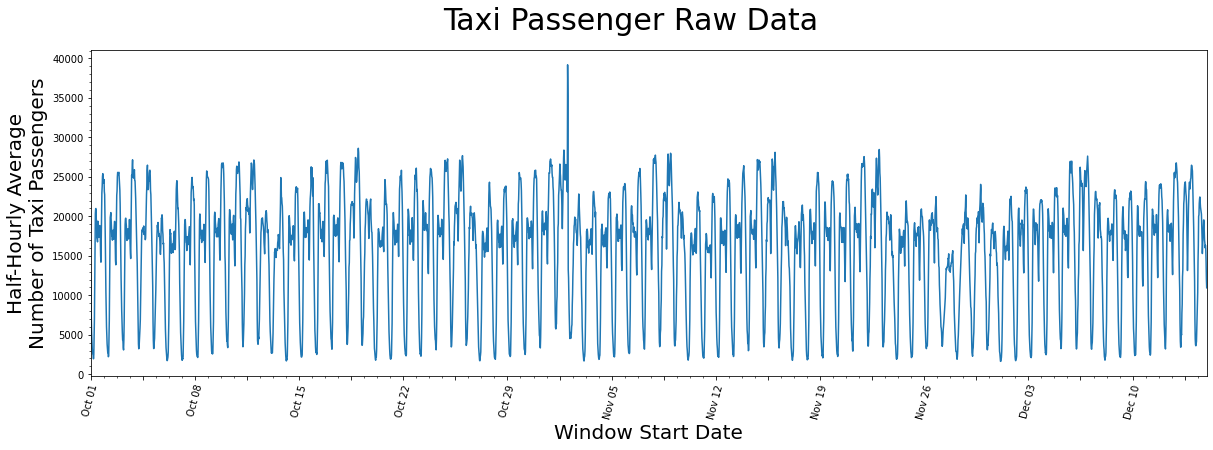

In [ ]:
# This code is going to be utilized to control the axis labeling of the plots
DAY_MULTIPLIER = 7  # Specify for the amount of days you want between each labeled x-axis tick

x_axis_labels = taxi_df[(taxi_df.timestamp.dt.hour==0)]['timestamp'].dt.strftime('%b %d').values[::DAY_MULTIPLIER]
x_axis_labels[1::2] = " "
x_axis_labels, DAY_MULTIPLIER

plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
plt.xlabel('Window Start Date', fontsize ='20')
plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
plt.plot(taxi_df['value'])

plt.xticks(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.show()

In [ ]:
m = 48
mp = stumpy.stump(taxi_df['value'], m=m)

In [ ]:
mp #0 index denotes the eucledian distance corresponding to nearest neighbour
   #1 index denotes the location of the nearest neighbour
   #2 index denotes location of left nearest neighbour
   #3 index denotes location of right nearest neighbour

array([[0.4625364182693321, 1680, -1, 1680],
       [0.4654127305310222, 1681, -1, 1681],
       [0.46710423514406935, 1682, -1, 1682],
       ...,
       [0.8037904104566025, 3214, 3214, -1],
       [0.8152584154200521, 3215, 3215, -1],
       [0.8293360140039625, 2208, 2208, -1]], dtype=object)

In [ ]:
mp[:,0].max(), mp[:,0].min()

(3.5225112340749614, 0.3196090265489718)

In [ ]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 27


In [ ]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 363


In [ ]:
discord_idx = np.argsort(mp[:, 0])[-1]
print(f"The discord is located at index {discord_idx}")

The discord is located at index 1537


In [ ]:
nearest_neighbor_discord_idx = mp[discord_idx, 1]
print(f"The nearest neighbor for discord is located at index {nearest_neighbor_discord_idx}")

The nearest neighbor for discord is located at index 193


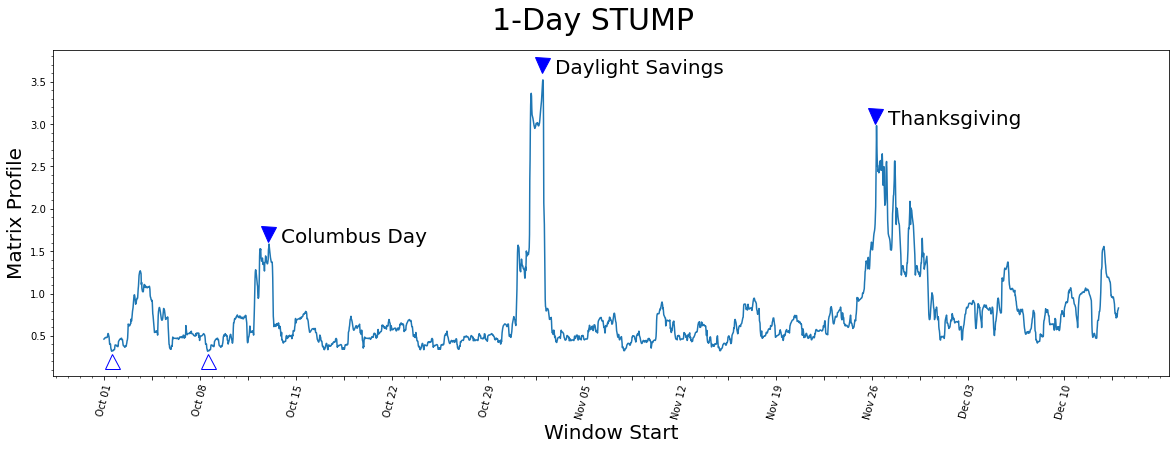

In [ ]:
plt.suptitle('1-Day STUMP', fontsize='30')
plt.xlabel('Window Start', fontsize ='20')
plt.ylabel('Matrix Profile', fontsize='20')
plt.plot(mp[:, 0])

plt.plot(575, 1.7, marker="v", markersize=15, color='b')
plt.text(620, 1.6, 'Columbus Day', color="black", fontsize=20)
plt.plot(1535, 3.7, marker="v", markersize=15, color='b')
plt.text(1580, 3.6, 'Daylight Savings', color="black", fontsize=20)
plt.plot(2700, 3.1, marker="v", markersize=15, color='b')
plt.text(2745, 3.0, 'Thanksgiving', color="black", fontsize=20)
plt.plot(30, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.plot(363, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.xticks(np.arange(0, 3553, (m*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()

In [ ]:
#Different Window sizes
days_dict ={
  "Half-Day": 24,
  "1-Day": 48,
  "2-Days": 96,
  "5-Days": 240,
  "7-Days": 336,
}

days_df = pd.DataFrame.from_dict(days_dict, orient='index', columns=['m'])
days_df.head()

,m
Half-Day,24
1-Day,48
2-Days,96
5-Days,240
7-Days,336


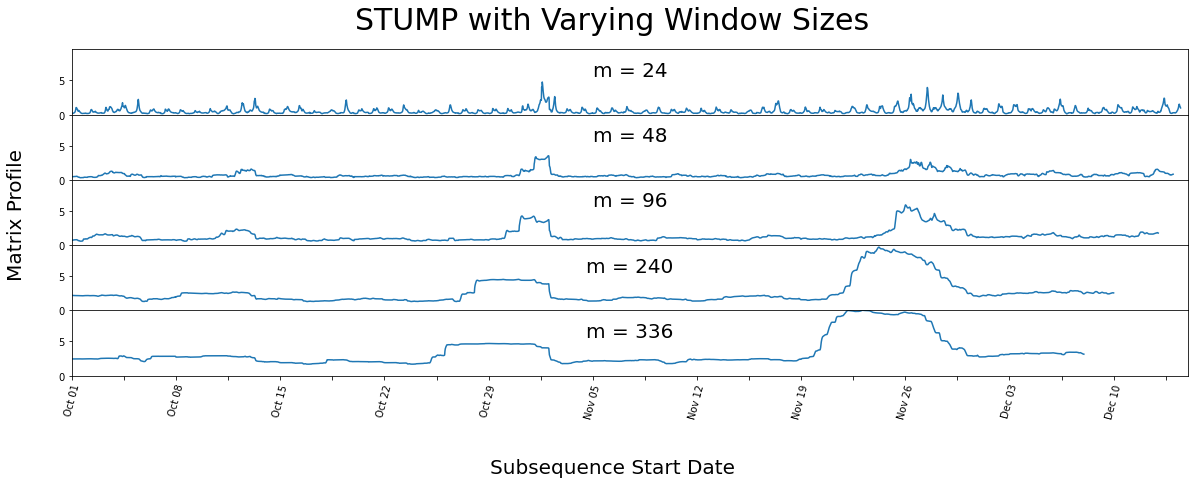

In [ ]:
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0})
fig.text(0.5, -0.1, 'Subsequence Start Date', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='20')
for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(taxi_df['value'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,9.5)
    axs[i].set_xlim(0,3600)
    title = f"m = {varying_m}"
    axs[i].set_title(title, fontsize=20, y=.5)
plt.xticks(np.arange(0, taxi_df.shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()

In [ ]:
df = pd.DataFrame(mp)
df.rename(columns={0: 'euc_distance',
                   1: 'nearest_neighbour'},
          inplace=True, errors='raise')

df = df[['euc_distance', 'nearest_neighbour', 2, 3]].apply(pd.to_numeric, axis = 1)
df

,euc_distance,nearest_neighbour,2,3
0,0.462536,1680.0,-1.0,1680.0
1,0.465413,1681.0,-1.0,1681.0
2,0.467104,1682.0,-1.0,1682.0
3,0.473099,1683.0,-1.0,1683.0
4,0.478382,1684.0,-1.0,1684.0
...,...,...,...,...
3548,0.753040,2204.0,2204.0,-1.0
3549,0.797730,3213.0,3213.0,-1.0
3550,0.803790,3214.0,3214.0,-1.0
3551,0.815258,3215.0,3215.0,-1.0


In [ ]:
df_f = df.nsmallest(n=10, columns=['euc_distance', 'nearest_neighbour']) #Top 10 Motif points
df_f

,euc_distance,nearest_neighbour,2,3
363,0.319609,27.0,27.0,1371.0
27,0.319609,363.0,3.0,363.0
368,0.324685,32.0,32.0,1376.0
32,0.324685,368.0,8.0,368.0
367,0.326022,31.0,31.0,1375.0
31,0.326022,367.0,7.0,367.0
366,0.326104,30.0,30.0,1374.0
30,0.326104,366.0,6.0,366.0
2157,0.326345,1821.0,1821.0,2493.0
1821,0.326345,2157.0,813.0,2157.0


In [ ]:
df_f = df.nlargest(n=10, columns=['euc_distance', 'nearest_neighbour']) #Top 10 discord points
df_f

,euc_distance,nearest_neighbour,2,3
1537,3.522511,193.0,193.0,1873.0
1536,3.506993,192.0,192.0,3216.0
1538,3.491024,194.0,194.0,1874.0
1535,3.469006,191.0,191.0,3215.0
1534,3.407557,862.0,862.0,3214.0
1496,3.363804,3176.0,1160.0,3176.0
1533,3.335592,861.0,861.0,3213.0
1497,3.330920,3177.0,825.0,3177.0
1495,3.321688,2503.0,1159.0,2503.0
1532,3.273959,860.0,860.0,1868.0


In [ ]:
plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
plt.xlabel('Window Start Date', fontsize ='20')
plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
plt.plot(taxi_df['value'])

axs[0].set_xticks(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
axs[0].set_xticks.xticks(rotation=75)
axs[0].set_xticks.minorticks_on()
axs[0].set_xticks.margins(x=0)

## Motif based on minimum Eucledian distance

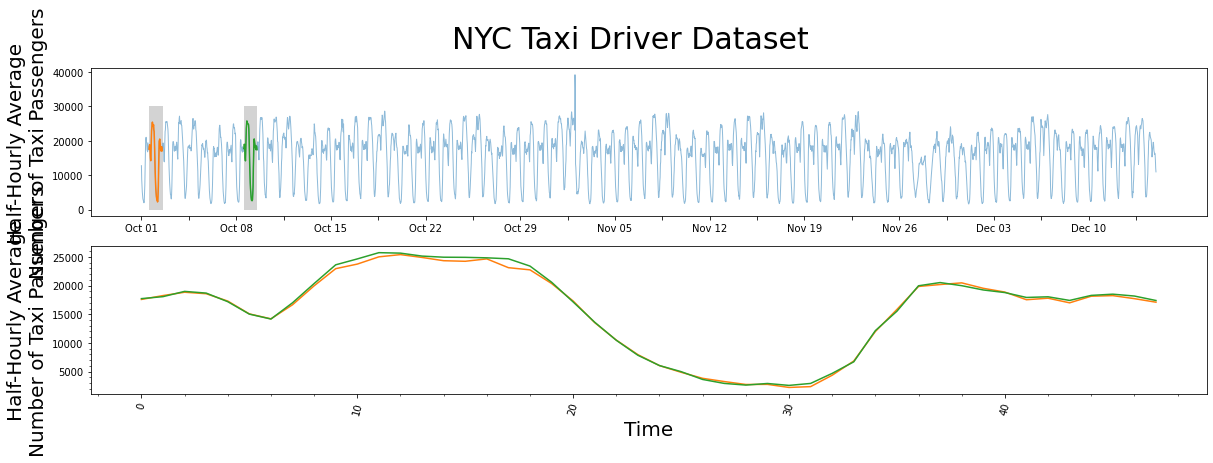

In [ ]:
m = 48 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('NYC Taxi Driver Dataset', fontsize='30')
axs[0].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[0].plot(taxi_df['value'], alpha=0.5, linewidth=1)
axs[0].plot(taxi_df['value'].iloc[27:27+m])
axs[0].plot(taxi_df['value'].iloc[363:363+m])

rect = Rectangle((27, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((363, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[1].plot(taxi_df['value'].values[27:27+m], color='C1')
axs[1].plot(taxi_df['value'].values[363:363+m], color='C2')
plt.setp(axs[0], xticks=(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2)), xticklabels = x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()

## Discord(anomaly) based on maximum Eucledian Distance

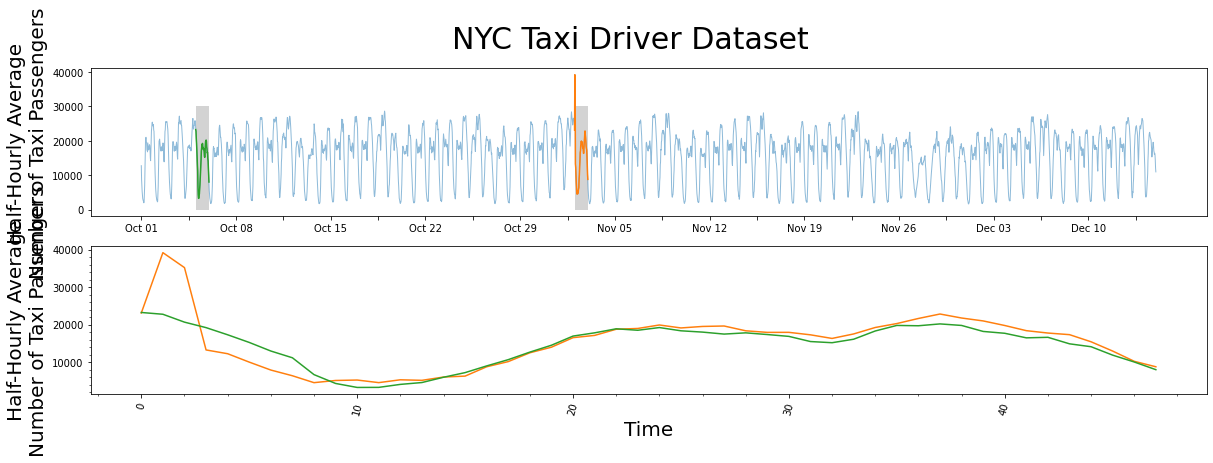

In [ ]:
m = 48 #subsequence length
fig, axs = plt.subplots(2)
plt.suptitle('NYC Taxi Driver Dataset', fontsize='30')
axs[0].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[0].plot(taxi_df['value'], alpha=0.5, linewidth=1)
axs[0].plot(taxi_df['value'].iloc[1537:1537+m])
axs[0].plot(taxi_df['value'].iloc[193:193+m])

rect = Rectangle((1537, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((193, 0), m, 30000, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel("Time", fontsize='20')
axs[1].set_ylabel("Half-Hourly Average\nNumber of Taxi Passengers", fontsize='20')
axs[1].plot(taxi_df['value'].values[1537:1537+m], color='C1')
axs[1].plot(taxi_df['value'].values[193:193+m], color='C2')
plt.setp(axs[0], xticks=(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2)), xticklabels = x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()

## Multidimensional Time Series

In [61]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [62]:
df = pd.read_csv("https://zenodo.org/record/4328047/files/toy.csv?download=1")
df.head()

,T1,T2,T3
0,0.565117,0.637180,0.741822
1,0.493513,0.629415,0.739731
2,0.469350,0.539220,0.718757
3,0.444100,0.577670,0.730169
4,0.373008,0.570180,0.752406


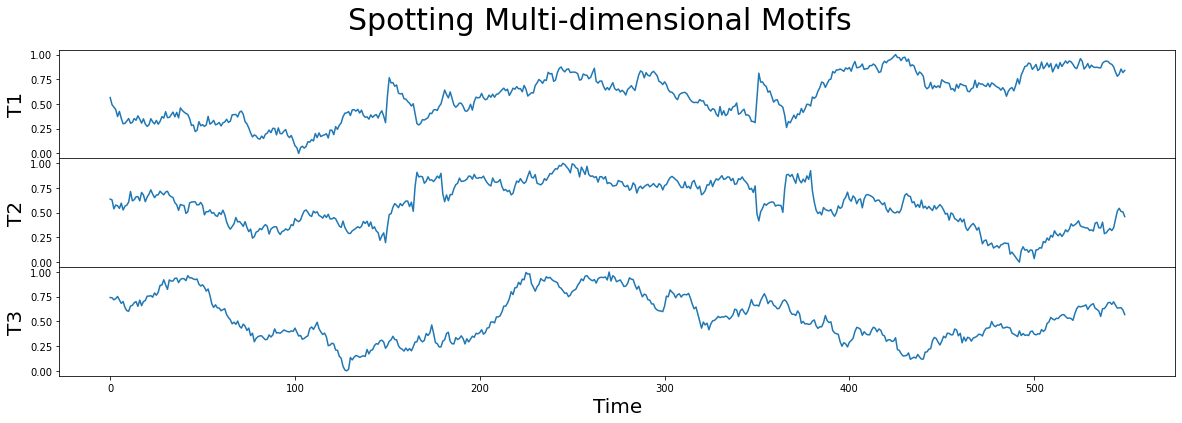

In [ ]:
fig, axs = plt.subplots(df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Spotting Multi-dimensional Motifs', fontsize='30')

for i in range(df.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].plot(df[f'T{i + 1}'])

plt.show()

## Naive approach(1 -dimensional Motif Dicovery)

In [ ]:
m = 30
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in df.columns:
    mps[dim_name] = stumpy.stump(df[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

The motif pair matrix profile value in T1 is 1.1
The motif pair matrix profile value in T2 is 1.0
The motif pair matrix profile value in T3 is 1.1


In [ ]:
motifs_idx

{'T1': array([149, 349]), 'T2': array([152, 352]), 'T3': array([45, 55])}

In [ ]:
mps

{'T1': array([[3.1947053598036397, 435, -1, 435],
        [3.7952551381100967, 39, -1, 39],
        [4.17249622424881, 40, -1, 40],
        ...,
        [4.912797071938603, 319, 319, -1],
        [4.628098953554095, 242, 242, -1],
        [4.500163286220334, 52, 52, -1]], dtype=object),
 'T2': array([[3.260468436055804, 89, -1, 89],
        [3.29321234731733, 90, -1, 90],
        [3.1962700151223244, 497, -1, 497],
        ...,
        [4.165713866410192, 125, 125, -1],
        [3.7763774749569383, 126, 126, -1],
        [3.51497798301857, 127, 127, -1]], dtype=object),
 'T3': array([[3.0163058302161603, 453, -1, 453],
        [2.837208828752078, 426, -1, 426],
        [2.682614670760898, 426, -1, 426],
        ...,
        [2.9643489466461856, 213, 213, -1],
        [3.1851957694818194, 214, 214, -1],
        [3.4906165593349203, 215, 215, -1]], dtype=object)}

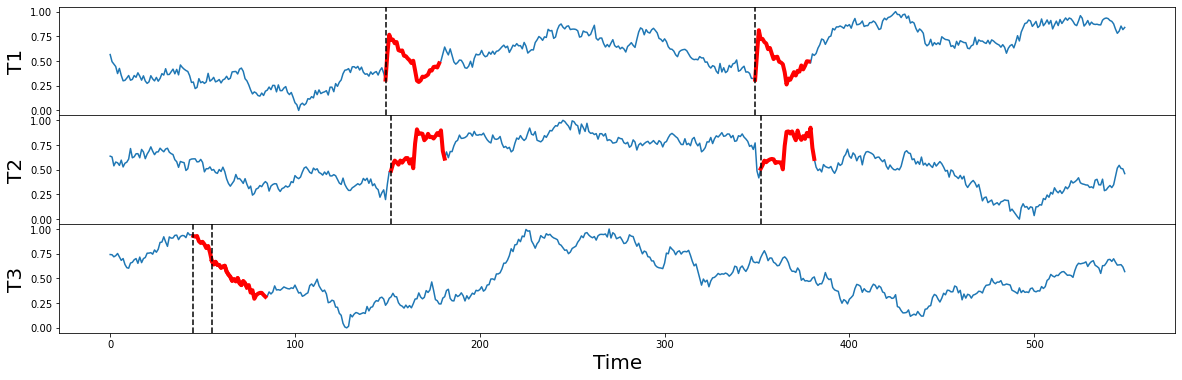

In [ ]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})

for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='20')
    axs[i].plot(df[dim_name])
    axs[i].set_xlabel('Time', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(df[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')

plt.show()

## 1 dimensional Discord Discovery

In [ ]:
m = 30
mps = {}  # Store the 1-dimensional matrix profiles
dicord_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in df.columns:
    mps[dim_name] = stumpy.stump(df[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].max(), 1)
    print(f"The discord pair matrix profile value in {dim_name} is {motif_distance}")
    dicord_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[-2:]

The discord pair matrix profile value in T1 is 5.8
The discord pair matrix profile value in T2 is 5.2
The discord pair matrix profile value in T3 is 6.0


In [ ]:
dicord_idx

{'T1': array([515, 440]), 'T2': array([516, 273]), 'T3': array([167, 168])}

## Multidimensional Matrix Profile

In [15]:
m = 30
mps, indices = stumpy.mstump(df, m)

In [16]:
mps # 3x521 dimensional matrix profile

array([[3.01630583, 2.83720883, 2.68261467, ..., 2.96434895, 3.18519577,
        3.49061656],
       [3.74779845, 3.58822096, 3.49334978, ..., 4.50403256, 4.46646621,
        4.55796841],
       [4.89094327, 4.61814682, 4.55491406, ..., 5.80773484, 5.48623554,
        5.37911065]])

In [17]:
indices # idices of matrix profile distances

array([[453, 426, 426, ..., 213, 214, 215],
       [485, 486, 487, ..., 213, 214, 215],
       [314, 180, 181, ..., 213,  76,  77]])

In [18]:
motifs_idx = np.argmin(mps, axis=1) #locating the minimum value in the corresponding k dimensional matrix profile
motifs_idx

array([352, 151, 108])

In [19]:
nn_idx = indices[np.arange(len(motifs_idx)), motifs_idx] #index location of the k dimensional nearest neighbour
nn_idx

array([152, 351, 365])

In [23]:
mps[0, 352], mps[1,151], mps[2, 108] 

(0.9966431647519601, 1.0705004058535041, 2.8668215033173574)

In [22]:
mps[0, 152], mps[1,351], mps[2, 365] #crosschecking the nearest neighbors

(0.9966431647520037, 1.070500405853506, 2.8668215033173716)

### we can plot the k-dimensional matrix profile (orange lines) for all possible values of (i.e., P1, P2, and P3) alongside the original time series data (blue lines):

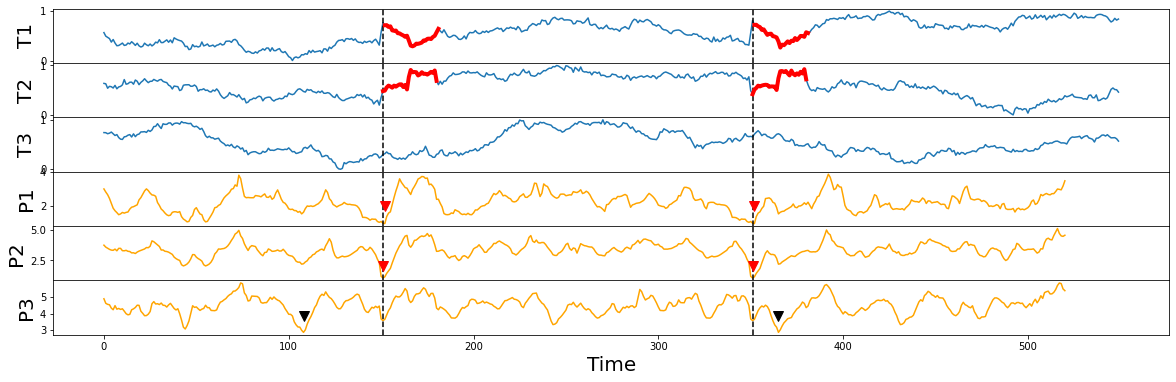

In [ ]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})

for k, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k].axvline(x=nn_idx[1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=nn_idx[1], linestyle="dashed", c='black')

    if dim_name != 'T3':
        axs[k].plot(range(motifs_idx[k], motifs_idx[k] + m), df[dim_name].iloc[motifs_idx[k] : motifs_idx[k] + m], c='red', linewidth=4)
        axs[k].plot(range(nn_idx[k], nn_idx[k] + m), df[dim_name].iloc[nn_idx[k] : nn_idx[k] + m], c='red', linewidth=4)
        axs[k + mps.shape[0]].plot(motifs_idx[k], mps[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='red')
        axs[k + mps.shape[0]].plot(nn_idx[k], mps[k, nn_idx[k]] + 1, marker="v", markersize=10, color='red')
    else:
        axs[k + mps.shape[0]].plot(motifs_idx[k], mps[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='black')
        axs[k + mps.shape[0]].plot(nn_idx[k], mps[k, nn_idx[k]] + 1, marker="v", markersize=10, color='black')

plt.show()

## Multidimensional Discords

In [63]:
m = 30
mps, indices = stumpy.mstump(df, m, include=[0, 1], discords = True) #Excluding T3 dimension

In [65]:
mps

array([[3.19470536, 3.79525514, 4.17249622, ..., 4.91279707, 4.62809895,
        4.50016329],
       [4.4191755 , 4.46871736, 4.57665489, ..., 5.2652224 , 4.87754776,
        4.86588153],
       [4.89094327, 4.61814682, 4.55491406, ..., 5.80773484, 5.48623554,
        5.37911065]])

In [66]:
discord_idx = np.argmax(mps, axis=1) #locating the maximum value in the corresponding k dimensional matrix profile
discord_idx

array([440, 515,  74])

In [67]:
nn_idx_discord = indices[np.arange(len(discord_idx)), discord_idx] #index location of the k dimensional nearest neighbour
nn_idx_discord

array([252, 297, 316])

In [68]:
mps[0, 440], mps[1,515], mps[2, 74] 

(2.5070895429192452, 5.6043612743582125, 5.847903579886363)

In [69]:
mps[0, 252], mps[1,297], mps[2, 316] 

(2.777163690163757, 4.300873767744619, 4.949753432219194)

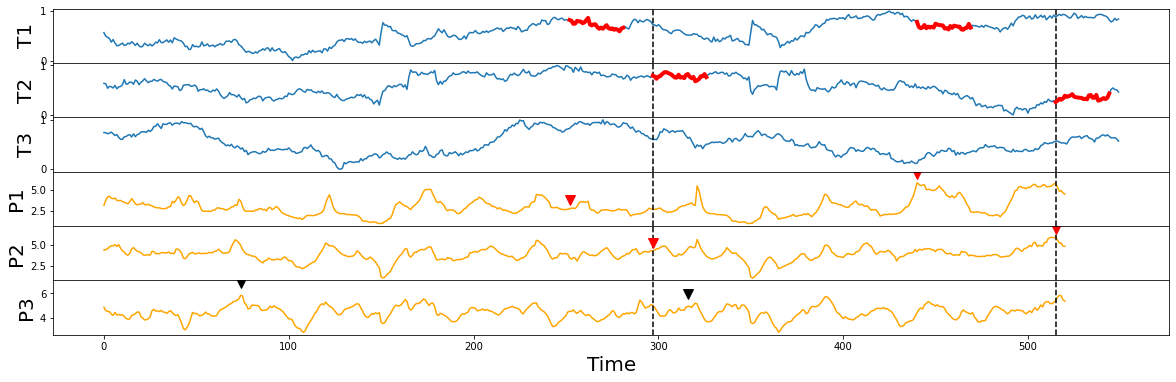

In [82]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})

for k, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=discord_idx[1], linestyle="dashed", c='black')
    axs[k].axvline(x=nn_idx_discord[1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=discord_idx[1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=nn_idx_discord[1], linestyle="dashed", c='black')

    if dim_name != 'T3':
        axs[k].plot(range(discord_idx[k], discord_idx[k] + m), df[dim_name].iloc[discord_idx[k] : discord_idx[k] + m], c='red', linewidth=4)
        axs[k].plot(range(nn_idx_discord[k], nn_idx_discord[k] + m), df[dim_name].iloc[nn_idx_discord[k] : nn_idx_discord[k] + m], c='red', linewidth=4)
        axs[k + mps.shape[0]].plot(discord_idx[k], mps[k, discord_idx[k]] + 1, marker="v", markersize=10, color='red')
        axs[k + mps.shape[0]].plot(nn_idx_discord[k], mps[k, nn_idx_discord[k]] + 1, marker="v", markersize=10, color='red')
    else:
        axs[k + mps.shape[0]].plot(discord_idx[k], mps[k, discord_idx[k]] + 1, marker="v", markersize=10, color='black')
        axs[k + mps.shape[0]].plot(nn_idx_discord[k], mps[k, nn_idx_discord[k]] + 1, marker="v", markersize=10, color='black')

plt.show()

In [77]:
mdls, subspaces = stumpy.mdl(df, m, discord_idx, nn_idx_discord)
mdls, subspaces

(array([1568.22064766, 1727.67522727, 1900.01078866]),
 [array([1]), array([1, 0]), array([2, 1, 0])])

In [76]:
k = 2
S = stumpy.subspace(df, m, discord_idx[k], nn_idx_discord[k], k, include=[0, 1], discords=True)
S

array([0, 1, 2])

In [86]:
k = np.argmax(mdls)
print(df.columns[subspaces[k]])
k

Index(['T3', 'T2', 'T1'], dtype='object')


2

## Finding the right K

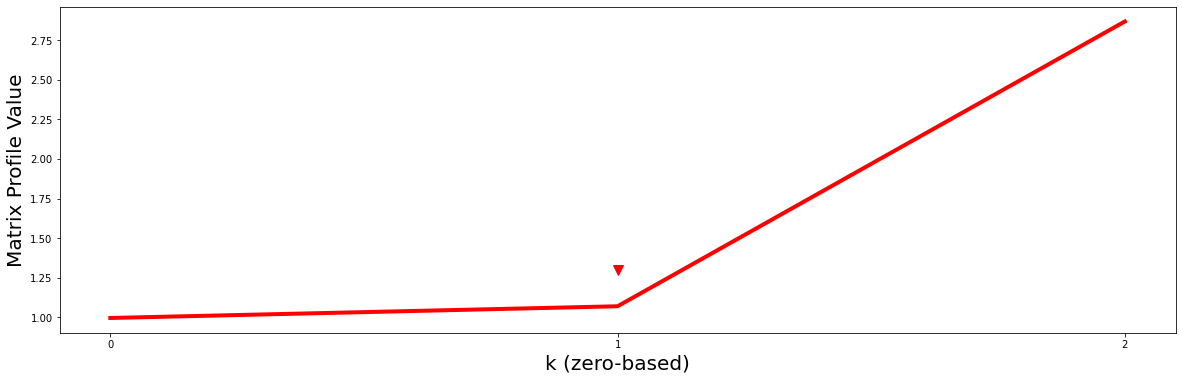

In [56]:
plt.plot(mps[range(mps.shape[0]), motifs_idx], c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Matrix Profile Value', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(1, 1.3, marker="v", markersize=10, color='red')
plt.show()
#we should choose P2 and its motif as the best motif out of all possible K-dimensional motifs.

## Optimal K using MDL approach

In [ ]:
"""
How similar is the k-dimensional motif pair? When we answer this question by leveraging MDL, we’ll find that a k-dimensional motif pair
with high similarity will allow for the greatest amount of information/data compression and the number of bits, or “bit size”,
will usually be lower than their peers. So, if we use the MDL framework to calculate the bit size for each of the k dimensions
for a given motif pair, then all we need to do to find k is to look for the global minima.
"""

In [26]:
motifs_idx, nn_idx

(array([352, 151, 108]), array([152, 351, 365]))

In [27]:
mdls, subspaces = stumpy.mdl(df, m, motifs_idx, nn_idx)

In [28]:
mdls #contains the bit sizes for each k dimension[here K =1]

array([1519.70685868, 1505.25177862, 1801.94802714])

In [39]:
subspaces #is a list that tells you exactly which subset of all dimensions were used to compute the kth MDL value.

[array([1]), array([1, 0]), array([0, 1, 2])]

In [37]:
k = np.argmin(mdls)
print(df.columns[subspaces[k]])

Index(['T2', 'T1'], dtype='object')


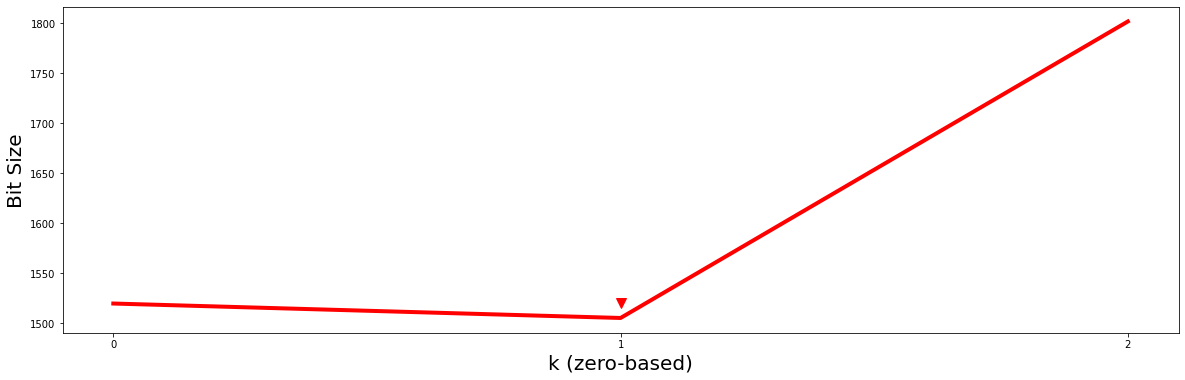

In [54]:
plt.plot(np.arange(len(mdls)), mdls, c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Bit Size', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(1, 1.01 * mdls[1], marker="v", markersize=10, color='red')
plt.show()

## Increasing the dimensions(7 additional dimension)

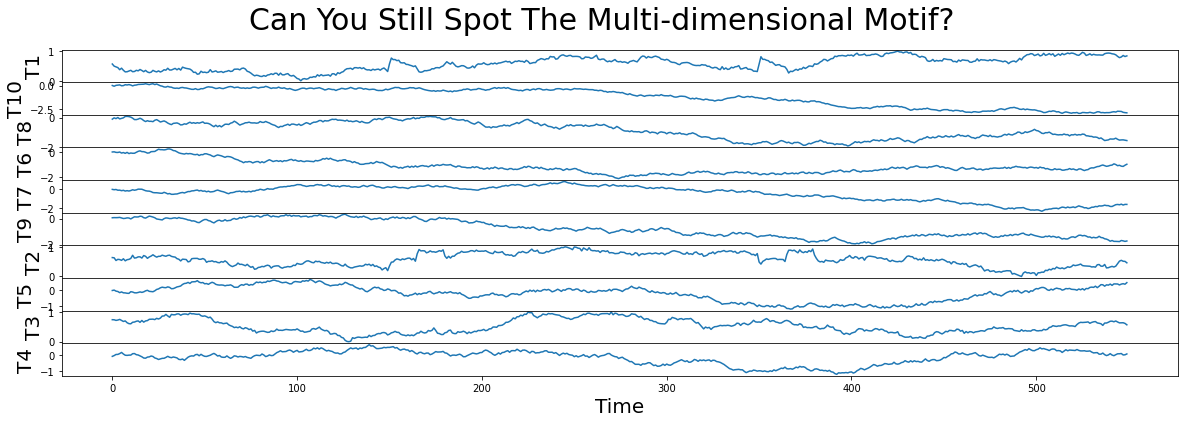

In [53]:
for i in range(4, 11):
    df[f'T{i}'] = np.random.uniform(0.1, -0.1, size=df.shape[0]).cumsum()

df = df.sample(frac=1, axis="columns")  # Randomly shuffle the columns

fig, axs = plt.subplots(df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Still Spot The Multi-dimensional Motif?', fontsize='30')

for i, colname in enumerate(df.columns):
    axs[i].set_ylabel(colname, fontsize='20')
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].plot(df[colname])

plt.show()

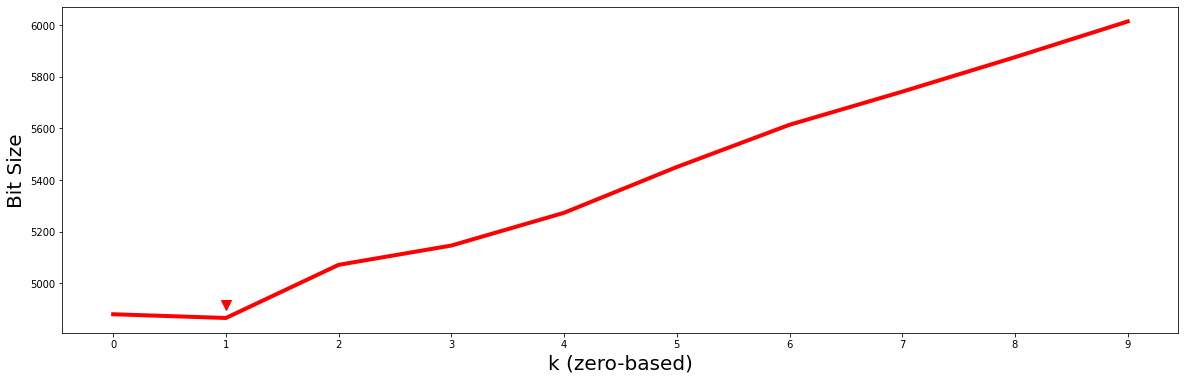

In [55]:
mps, indices = stumpy.mstump(df, m)
motifs_idx = np.argmin(mps, axis=1)
nn_idx = indices[np.arange(len(motifs_idx)), motifs_idx]
mdls, subspaces = stumpy.mdl(df, m, motifs_idx, nn_idx)
k = np.argmin(mdls)
plt.plot(np.arange(len(mdls)), mdls, c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Bit Size', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(k, 1.01 * mdls[k], marker="v", markersize=10, color='red')
plt.show()
#Even with 7 additional dimensions added to the mix, the minimum MDL bit size still occurs at k=1(red arrowhead)

In [56]:
# if you already have a specific value of k in mind due to some prior knowledge or constraint you can find the subspace,
#by using stumpy.subspace
k = 1
subspace = stumpy.subspace(df, m, motifs_idx[k], nn_idx[k], k)

print(f"For k = {k}, the {k + 1}-dimensional subspace includes subsequences from {df.columns[subspace].values}")
# according to the k-dimensional subspace, the motif should be extracted from T2 and T1 out of all of the possible time series dimensions.

For k = 1, the 2-dimensional subspace includes subsequences from ['T2' 'T1']


## Constrained Search